# Análisis de Ventas Tienda UrbanAura 2020 - 2024

### Objetivo: Analizar el comportamiento de ventas por tienda, categoría de producto o período de tiempo, identificar patrones de consumo o clientes frecuentes.

## 1. Descripción de los datos

In [69]:
# Importar liberías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [70]:
# Cargamos y leemos los archivos de datos
clientes = pd.read_csv('C:/Users/inaki/OneDrive/Escritorio/Iñaki/Proyectos Personales Iñaki/Proyectos Python/Tienda UrbanAura/customers.csv', encoding='latin1')
productos = pd.read_csv('C:/Users/inaki/OneDrive/Escritorio/Iñaki/Proyectos Personales Iñaki/Proyectos Python/Tienda UrbanAura/products.csv', encoding='latin1')
tiendas = pd.read_csv('C:/Users/inaki/OneDrive/Escritorio/Iñaki/Proyectos Personales Iñaki/Proyectos Python/Tienda UrbanAura/stores.csv', encoding='latin1')
ventas = pd.read_csv('C:/Users/inaki/OneDrive/Escritorio/Iñaki/Proyectos Personales Iñaki/Proyectos Python/Tienda UrbanAura/sales.csv', encoding='latin1')


In [71]:
# Imprimimos el head de cada uno de los df

# Clientes
print("Clientes")
print(clientes.head())
print("------------------------------------------------------------------")
# Productos
print("Productos")
print(productos.head())
print("------------------------------------------------------------------")
# Tiendas
print("Tiendas")
print(tiendas.head())
print("------------------------------------------------------------------")
# Ventas
print("Ventas")
print(ventas.head())

Clientes
  customer_id first_name last_name                       email   join_date
0        C001    Brianna      Hunt     michaelluna@hotmail.com  22/11/2020
1        C002    Heather    Harris  david19@goodman-parker.com  30/01/2024
2        C003       Anna   Carlson  james47@taylor-ramirez.com  29/12/2021
3        C004      Tammy   Gilbert          andrew28@yahoo.com  05/06/2021
4        C005     Justin     Green      evanmartinez@mcgee.com  30/08/2021
------------------------------------------------------------------
Productos
  product_id    product_name  category   price
0       P001  Letter Compare   Frescos  233.76
1       P002      Source All  Limpieza  353.27
2       P003       Idea Onto  Despensa  436.59
3       P004    Sit Magazine  LÃ¡cteos  254.60
4       P005      Far Before   Frescos  239.75
------------------------------------------------------------------
Tiendas
  store_id store_name   location
0     S001   Tienda 1  Barcelona
1     S002   Tienda 2     Lisboa
2     S0

In [72]:
# Mostramos la información de los df

# Clientes
print("Clientes")
print(clientes.info())
print("------------------------------------------------------------------")
# Productos
print("Productos")
print(productos.info())
print("------------------------------------------------------------------")
# Tiendas
print("Tiendas")
print(tiendas.info())
print("------------------------------------------------------------------")
# Ventas
print("Ventas")
print(ventas.info())

Clientes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  100 non-null    object
 1   first_name   100 non-null    object
 2   last_name    100 non-null    object
 3   email        100 non-null    object
 4   join_date    100 non-null    object
dtypes: object(5)
memory usage: 4.0+ KB
None
------------------------------------------------------------------
Productos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_id    50 non-null     object 
 1   product_name  50 non-null     object 
 2   category      50 non-null     object 
 3   price         50 non-null     float64
dtypes: float64(1), object(3)
memory usage: 1.7+ KB
None
--------------------------------------------------------------

In [73]:
# Mostramos la estadística descriptiva de los df

# Clientes
print("Clientes")
print(clientes.describe())
print("------------------------------------------------------------------")
# Productos
print("Productos")
print(productos.describe())
print("------------------------------------------------------------------")
# Tiendas
print("Tiendas")
print(tiendas.describe())
print("------------------------------------------------------------------")
# Ventas
print("Ventas")
print(ventas.describe())

Clientes
       customer_id first_name  last_name                    email   join_date
count          100        100        100                      100         100
unique         100         73         88                      100          98
top           C001    William  Rodriguez  michaelluna@hotmail.com  22/11/2021
freq             1          6          3                        1           2
------------------------------------------------------------------
Productos
            price
count   50.000000
mean   241.768200
std    133.184613
min     11.450000
25%    152.922500
50%    237.400000
75%    345.112500
max    499.860000
------------------------------------------------------------------
Tiendas
       store_id store_name   location
count        10         10         10
unique       10         10         10
top        S001   Tienda 1  Barcelona
freq          1          1          1
------------------------------------------------------------------
Ventas
          quantity
coun

## Preparación de los datos

In [75]:
# Convertimos los datos en los tipos de datos necesarios

# Primero inspeccionamos los tipos actuales
print(clientes.dtypes)
print("------------------------------------------------------------------")
print(productos.dtypes)
print("------------------------------------------------------------------")
print(tiendas.dtypes)
print("------------------------------------------------------------------")
print(ventas.dtypes)

customer_id    object
first_name     object
last_name      object
email          object
join_date      object
dtype: object
------------------------------------------------------------------
product_id       object
product_name     object
category         object
price           float64
dtype: object
------------------------------------------------------------------
store_id      object
store_name    object
location      object
dtype: object
------------------------------------------------------------------
sale_id        object
customer_id    object
product_id     object
store_id       object
sale_date      object
quantity        int64
dtype: object


#### Tipo de dato

In [127]:
# Df Clientes
clientes['customer_id'] = clientes['customer_id'].astype('string')
clientes['first_name'] = clientes['first_name'].astype('string')
clientes['last_name'] = clientes['last_name'].astype('string')
clientes['email'] = clientes['email'].astype('string')
clientes['join_date'] = pd.to_datetime(clientes['join_date'], format='%d/%m/%Y')

In [78]:
# Verificamos el cambio de tipo de dato
print(clientes.dtypes)

customer_id    string[python]
first_name     string[python]
last_name      string[python]
email          string[python]
join_date      datetime64[ns]
dtype: object


In [79]:
# Df Productos
productos['product_id'] = productos['product_id'].astype('string')
productos['product_name'] = productos['product_name'].astype('string')
productos['category'] = productos['category'].astype('string')

In [80]:
# Verificamos el cambio de tipo de dato
print(productos.dtypes)

product_id      string[python]
product_name    string[python]
category        string[python]
price                  float64
dtype: object


In [81]:
# Df Tiendas
tiendas['store_id'] = tiendas['store_id'].astype('string')
tiendas['store_name'] = tiendas['store_name'].astype('string')
tiendas['location'] = tiendas['location'].astype('string')

In [82]:
# Verificamos el cambio de tipo de dato
print(tiendas.dtypes)

store_id      string[python]
store_name    string[python]
location      string[python]
dtype: object


In [83]:
# Df Ventas
ventas['sale_id'] = ventas['sale_id'].astype('string')
ventas['customer_id'] = ventas['customer_id'].astype('string')
ventas['product_id'] = ventas['product_id'].astype('string')
ventas['store_id'] = ventas['store_id'].astype('string')
ventas['sale_date'] = pd.to_datetime(ventas['sale_date'], format='%d/%m/%Y')

In [84]:
# Verificamos el cambio de tipo de dato
print(ventas.dtypes)

sale_id        string[python]
customer_id    string[python]
product_id     string[python]
store_id       string[python]
sale_date      datetime64[ns]
quantity                int64
dtype: object


Ahora todos los campos de todos los df tienen asignado su tipo de datos correspondiente

### Valores Ausentes

In [131]:
# Vamos a identificar si existen valores ausentes
print(clientes.isnull().sum())
print("------------------------------------------------------------------")
print(productos.isnull().sum())
print("------------------------------------------------------------------")
print(tiendas.isnull().sum())
print("------------------------------------------------------------------")
print(ventas.isnull().sum())

customer_id    0
first_name     0
last_name      0
email          0
join_date      0
dtype: int64
------------------------------------------------------------------
product_id      0
product_name    0
category        0
price           0
dtype: int64
------------------------------------------------------------------
store_id      0
store_name    0
location      0
dtype: int64
------------------------------------------------------------------
sale_id        0
customer_id    0
product_id     0
store_id       0
sale_date      0
quantity       0
dtype: int64


Del análisis podemos identificar que no hay valores nulos, por lo que no es necesario tratarlos

### Valores duplicados

In [146]:
# Vamos a identificar si existen valores ausentes
print(clientes.duplicated().sum())
print("------------------------------------------------------------------")
print(productos.duplicated().sum())
print("------------------------------------------------------------------")
print(tiendas.duplicated().sum())
print("------------------------------------------------------------------")
print(ventas.duplicated().sum())

0
------------------------------------------------------------------
0
------------------------------------------------------------------
0
------------------------------------------------------------------
0


Del análisis sabemos que tampoco hay valores duplicados, por lo que podemos continuar con el análisis de resultados

## Análisis de los datos

C:\Users\inaki\AppData\Local\Temp\ipykernel_9092\534210361.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=productos_top5['product_name'], y='ventas', data=productos_top5, palette='viridis')


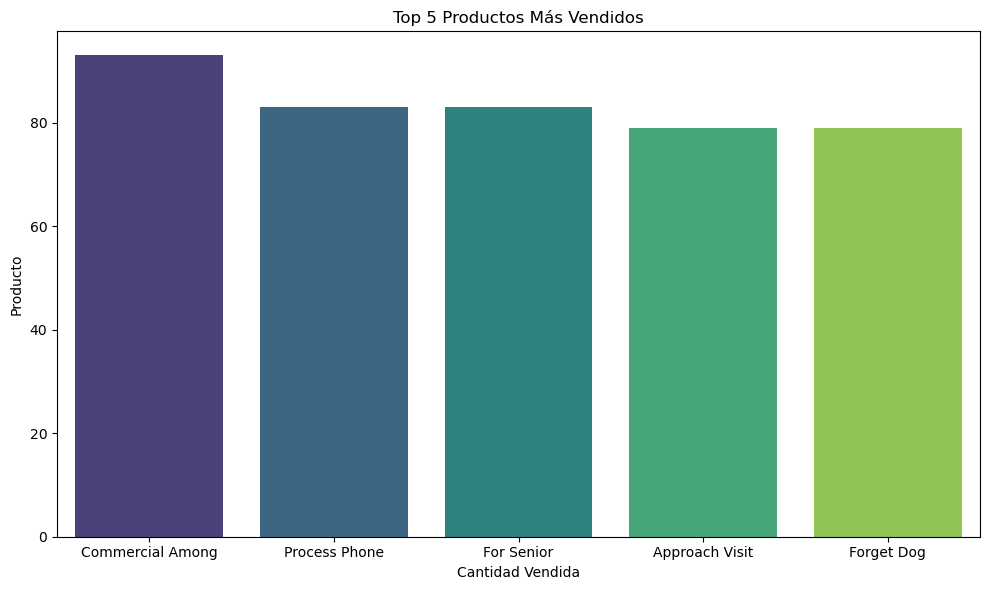

In [185]:
## 1. Top 5 productos más vendidos
ventas_por_producto = ventas.groupby('product_id')['quantity'].sum().sort_values(ascending=False).head(5)
productos_top5 = productos.set_index('product_id').loc[ventas_por_producto.index]
productos_top5['ventas'] = ventas_por_producto.values

plt.figure(figsize=(10, 6))
sns.barplot(x=productos_top5['product_name'], y='ventas', data=productos_top5, palette='viridis')
plt.title('Top 5 Productos Más Vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

Del análisis podemos ver el Top 5 productos más vendidos de 2020 - 2024, con el producto "Commercial Among" encabezando la lista con un total de más de 80 ventas. Por otro lado tenemos al "Procees Phone" y al "For Senior" llevandose el segundo y tercer lugar con ventas ligeramente superiores a las 80.

C:\Users\inaki\AppData\Local\Temp\ipykernel_9092\1744103111.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='quantity', y='location', data=ingresos_por_tienda_plot, palette='magma')


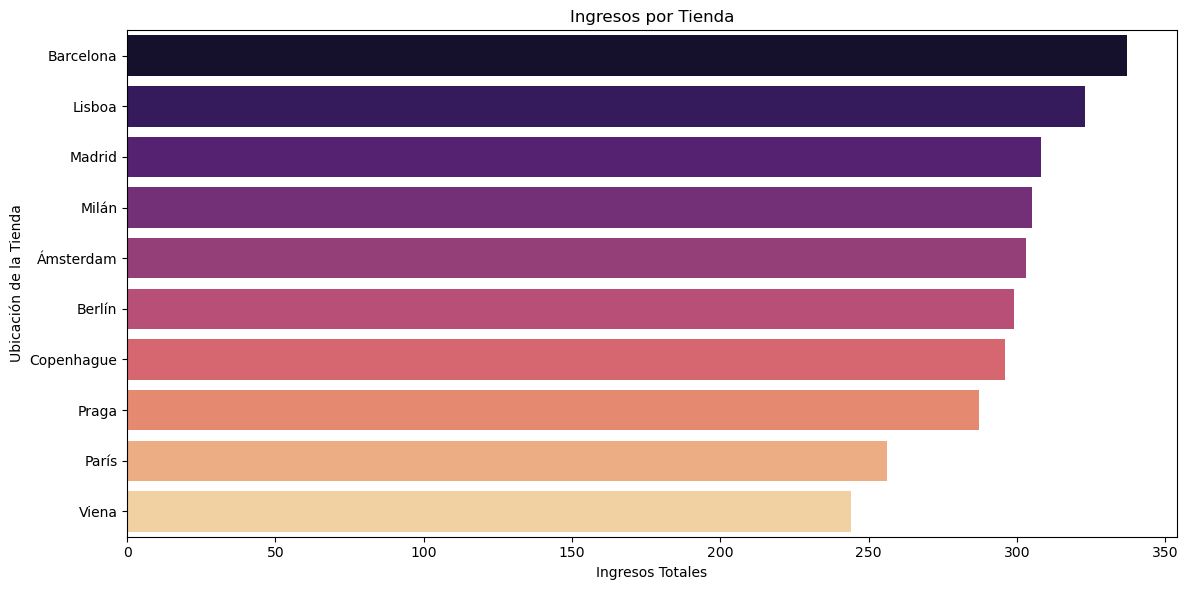

In [173]:
## 2. Ventas por ciudad o tienda
ventas_tienda = ventas.merge(tiendas, on='store_id')
ingresos_por_tienda = ventas_tienda.groupby(['store_id', 'location'])['quantity'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ingresos_por_tienda_plot = ingresos_por_tienda.reset_index()
sns.barplot(x='quantity', y='location', data=ingresos_por_tienda_plot, palette='magma')
plt.title('Ingresos por Tienda')
plt.xlabel('Ingresos Totales')
plt.ylabel('Ubicación de la Tienda')
plt.tight_layout()
plt.show()

De acuerdo con la estadística, tenemos que Barcelona fue la tienda que más ingresos obtuvo en las tiendas y Madrid quedó en 3er lugar, por lo que podemos decir que España encabeza la lista de los países con más ingresos y por ende se debe de poner atención en este país. Por otro lado, se tiene que Lisboa, Portugal y Milán, Italia se encuentran en los países con más ventas, mientrás que París y Viena son las dos ciudades con menos ventas, se deberá analizar el porque de esto.

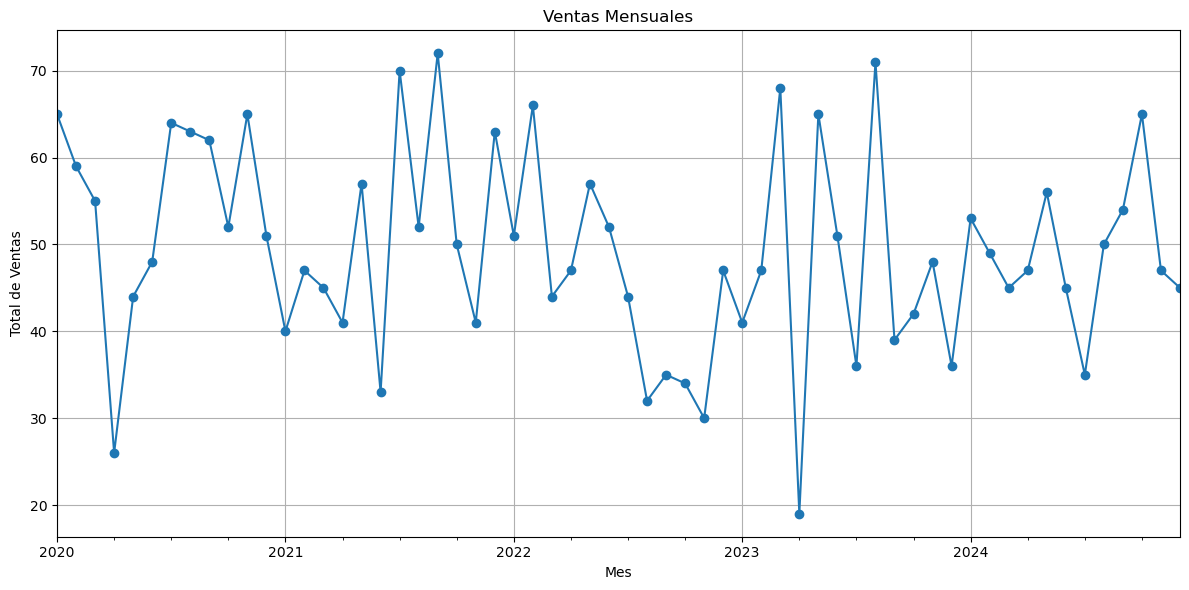

In [177]:
## 3. Comparativa de ventas por día / semana / mes
ventas['sale_date'] = pd.to_datetime(ventas['sale_date'], dayfirst=True)
ventas_por_dia = ventas.groupby(ventas['sale_date'].dt.date)['quantity'].sum()
ventas_por_semana = ventas.groupby(ventas['sale_date'].dt.to_period('W'))['quantity'].sum()
ventas_por_mes = ventas.groupby(ventas['sale_date'].dt.to_period('M'))['quantity'].sum()

ventas_por_mes.index = ventas_por_mes.index.to_timestamp()
plt.figure(figsize=(12, 6))
ventas_por_mes.plot(kind='line', marker='o')
plt.title('Ventas Mensuales')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()

De esta gráfica, podemos darnos una idea de como las ventas estuvieron fluctuando mes a mes, incluso año con año. Si nos metemos al detalle, podemos ver que hubo picos importantes de ventas (superando las 65 ventas) en 2021 y 2023, mientras que a simple vista el año de 2022 fue el que menores ventas tuvo. De esto se deberá entender el porque de este comportamiento e implementar algunas estrategías de marketing para atraer clientes e incrementar las ventas, ya que en 2024 las ventas estsuvieron bajas a comparación con los otros años.

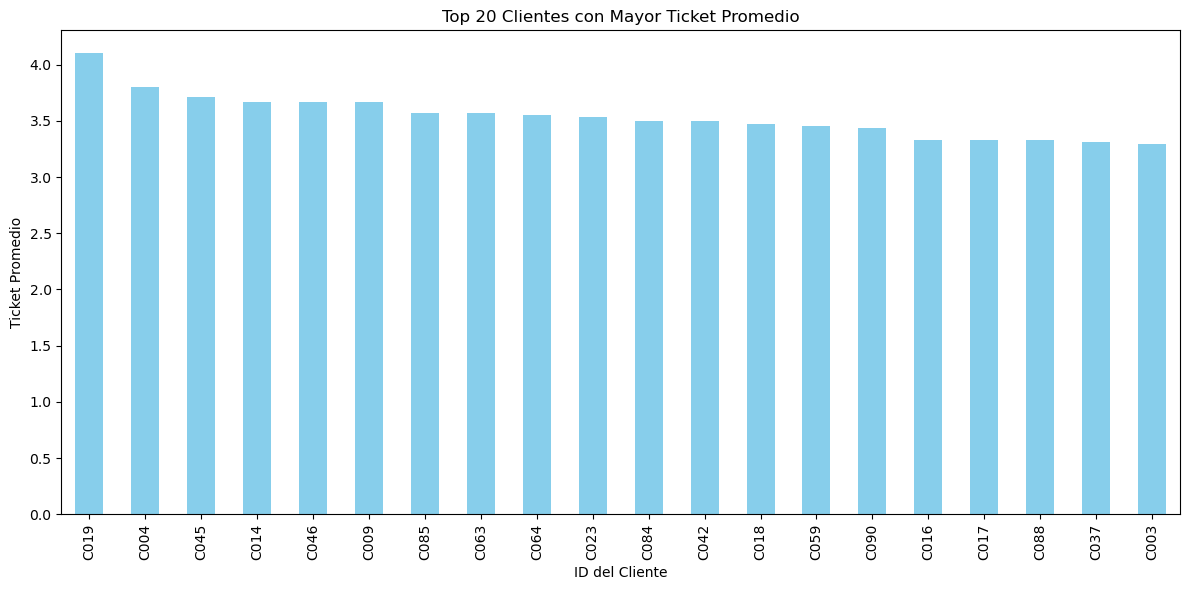

In [191]:
## 4. Ticket promedio por cliente
ingresos_cliente = ventas.groupby('customer_id')['quantity'].sum()
compras_cliente = ventas.groupby('customer_id')['sale_id'].count()
ticket_promedio = (ingresos_cliente / compras_cliente).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
ticket_promedio.head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Clientes con Mayor Ticket Promedio')
plt.xlabel('ID del Cliente')
plt.ylabel('Ticket Promedio')
plt.tight_layout()
plt.show()

De la gráfica podemos observar que el ticket promedio del top 20 de clientes ronda entre los 3 y 4 artículos por compra. Esto nos dice que los clientes vienen por más de 1 artículo, por lo que podemos crear estrategías para incrementar este ticket promedio e incrementar las ventas.

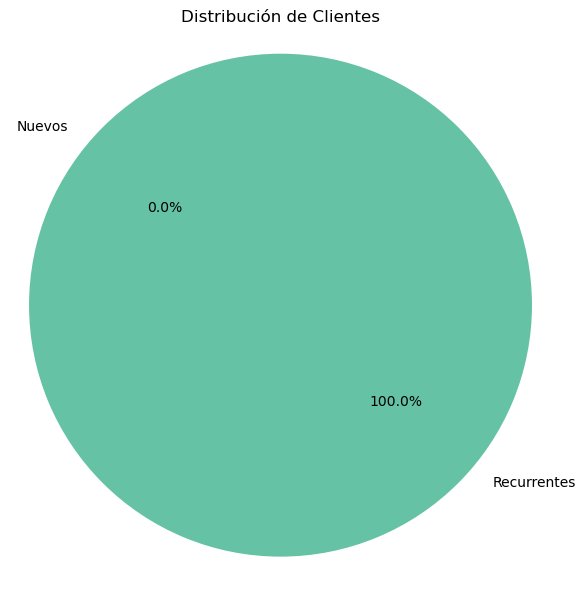

In [161]:
## 5. Clientes recurrentes vs. nuevos clientes
compras_por_cliente = ventas['customer_id'].value_counts()
clientes_recurrentes = compras_por_cliente[compras_por_cliente > 1].count()
clientes_nuevos = compras_por_cliente[compras_por_cliente == 1].count()

plt.figure(figsize=(6, 6))
labels = ['Recurrentes', 'Nuevos']
valores = [clientes_recurrentes, clientes_nuevos]
plt.pie(valores, labels=labels, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=140)
plt.title('Distribución de Clientes')
plt.axis('equal')
plt.tight_layout()
plt.show()

Finalmente podemos ver que el 100% de los clientes son recurrentes; es decir, no tenemos clientes nuevos. Por lo que hay un área de oportunidad para poder llegar a más personas y que la empresa crezca en ventas e ingresos.

## Conclusiones

**Fidelización sólida de clientes:**

Dado que todos los clientes son recurrentes, la tienda ha logrado establecer relaciones duraderas con su base de compradores. Esto sugiere una estrategia de retención efectiva, ya sea por calidad del producto, servicio al cliente o programas de lealtad.

**Productos líderes en ventas**

"Commercial Among" y "Process Phone" son los más vendidos, lo que indica que estos artículos son altamente demandados por los clientes existentes. La tienda podría aprovechar este patrón para impulsar promociones o paquetes en torno a estos productos.

**Ubicaciones clave en ingresos**

Barcelona, Lisboa y Madrid generan los mayores ingresos, lo que revela una concentración de clientes frecuentes en estas ciudades. Sería interesante analizar qué hace que estas ubicaciones sean más rentables (preferencias de consumo, oferta de productos, estrategias de marketing, etc.).

**Comportamiento estacional en ventas**

La variabilidad en las ventas mensuales sugiere posibles factores estacionales o campañas que afectan el consumo. Identificar los picos y valles podría ayudar a optimizar estrategias de ventas y anticiparse a períodos de menor demanda.

**Clientes premium con alto ticket promedio**

La presencia de clientes con tickets promedio altos indica una segmentación valiosa. Fortalecer la relación con estos compradores mediante beneficios exclusivos o atención personalizada podría generar aún más valor para la tienda.



**Estrategías clave**

Considerando todo esto, podrías explorar estrategias como:

- Programas de recomendación para incentivar a clientes recurrentes a traer nuevos compradores.

- Optimización de inventario basada en los productos más vendidos.

- Estrategias de fidelización enfocadas en los clientes de mayor gasto.





